In [1]:
from RandomForest import RandomForestClassifier, RandomForestRegressor
import pandas as pd

1.11.2.1. Случайные леса

# Регрессия

In [2]:
df1 = pd.read_csv("Housing.csv")

In [3]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
dict = {
    'yes':1,
    'no':0
}

df1['mainroad'] = df1['mainroad'].map(dict)
df1['guestroom'] = df1['guestroom'].map(dict)
df1['basement'] = df1['basement'].map(dict)
df1['hotwaterheating'] = df1['hotwaterheating'].map(dict)
df1['airconditioning'] = df1['airconditioning'].map(dict)
df1['prefarea'] = df1['prefarea'].map(dict)

In [5]:
dict = {
    'furnished':2,
    'semi-furnished':1,
    'unfurnished':0
}

df1['furnishingstatus'] = df1['furnishingstatus'].map(dict)

In [6]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [7]:
rand_state = 1000
y = df1['price']
X = df1.drop(["price"], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

def metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')

## Без подбора параметров

In [9]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train,y_train)

In [10]:
pred_reg = rf_reg.predict(X_test)

In [11]:
metrics(pred_reg, y_test)
print(f'R^2: {rf_reg.score(X_test, y_test)}')

MAE: 909836.0486238534
MSE: 1524757319251.8013
RMSE: 1234810.641050603
MAPE: 0.4316866801621841
R^2: 0.5633985625139951


## С подбором параметров

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [13]:
parameters = {'n_estimators': np.arange(1, 10, 1),
             "max_depth": np.arange(10, 15, 1),
             "min_samples_split": np.arange(2, 6, 1)}

#rf_reg_optimal = GridSearchCV(RandomForestRegressor(), parameters)

#print(rf_reg_optimal.best_params_['n_estimators']) # 8
#print(rf_reg_optimal.best_params_['max_depth']) # 13
#print(rf_reg_optimal.best_params_['min_samples_split']) # 4

In [14]:
rf_reg_optimal = RandomForestRegressor(n_estimators=8, max_depth=13, min_samples_split=4)
rf_reg_optimal.fit(X_train, y_train)
rf_reg_optimal_pred = rf_reg_optimal.predict(X_test)

In [15]:
metrics(rf_reg_optimal_pred, y_test)
print(f'R^2: {rf_reg_optimal.score(X_test, y_test)}')

MAE: 1012212.6632436755
MSE: 2108135356542.4668
RMSE: 1451941.9260226858
MAPE: 0.4558950710910043
R^2: 0.39635316685467026


## Удаление выбросов

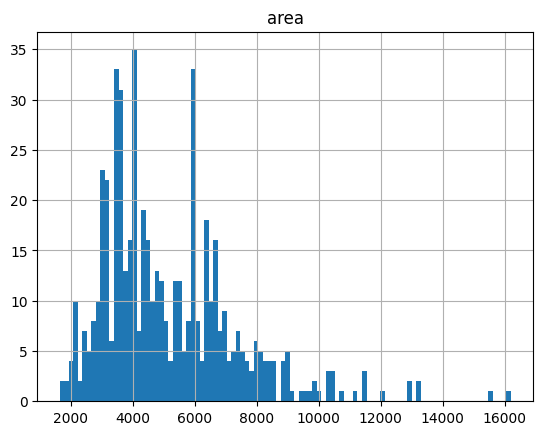

In [16]:
columns = ['area']

for col in columns:
    df1.hist(col, bins=100)

In [17]:
outlier = df1[['area']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR=Q3-Q1
df1_f = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

index_list = list(df1_f.index.values)
df1_f = df1[df1.index.isin(index_list)]

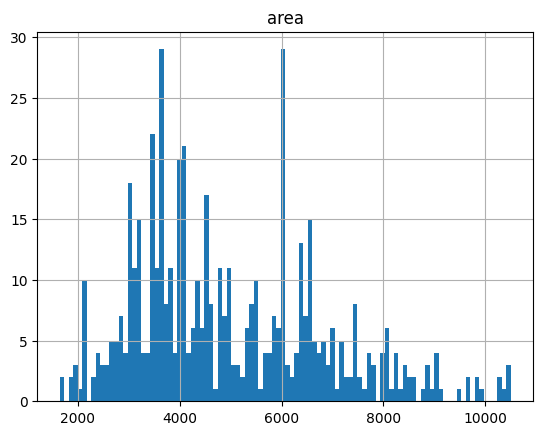

In [18]:
filtered_outlier = df1_f[['area']]
for col in filtered_outlier:
    df1_f.hist(col, bins=100)

In [19]:
rand_state = 1000
y = df1_f['price']
X = df1_f.drop(["price"], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [20]:
parameters = {'n_estimators': np.arange(1, 10, 1),
             "max_depth": np.arange(10, 15, 1),
             "min_samples_split": np.arange(2, 6, 1)}

#rf_reg_optimal = GridSearchCV(RandomForestRegressor(), parameters).fit(X_train, y_train)

#print(rf_reg_optimal.best_params_['n_estimators']) 9
#print(rf_reg_optimal.best_params_['max_depth']) 11
#print(rf_reg_optimal.best_params_['min_samples_split']) 4

In [21]:
rf_reg_optimal = RandomForestRegressor(n_estimators=9,max_depth=11, min_samples_split=3)
rf_reg_optimal.fit(X_train, y_train)
rf_reg_optimal_pred = rf_reg_optimal.predict(X_test)

In [22]:
metrics(rf_reg_optimal_pred, y_test)
print(f'R^2: {rf_reg_optimal.score(X_test, y_test)}')

MAE: 770824.3323749177
MSE: 1157385820885.6655
RMSE: 1075818.6747243542
MAPE: 0.39774353400260937
R^2: 0.6579355415972488


## Базовый класс

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
regr = RandomForestRegressor(n_estimators=9,max_depth=11, min_samples_split=4)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, min_samples_split=4, n_estimators=9)

In [25]:
regr_pred = regr.predict(X_test)

In [26]:
metrics(regr_pred, y_test)
print(f'R^2: {regr.score(X_test, y_test)}')

MAE: 806092.7317349287
MSE: 1358242405349.5981
RMSE: 1165436.5728556823
MAPE: 0.40753893946066505
R^2: 0.5985725378853961


# Классификация

## Удаление выбросов

In [27]:
df2 = pd.read_csv("apple_quality.csv")

In [28]:
df2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [29]:
df2.drop(df2.tail(1).index,inplace=True)
del df2["A_id"]
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [30]:
dict = {
    'good':1,
    'bad':0
}

df2['Quality'] = df2['Quality'].map(dict)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 250.1+ KB


In [32]:
df2['Acidity'] = df2['Acidity'].astype(float)

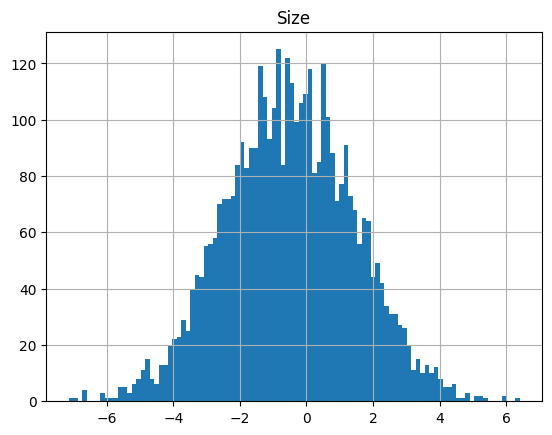

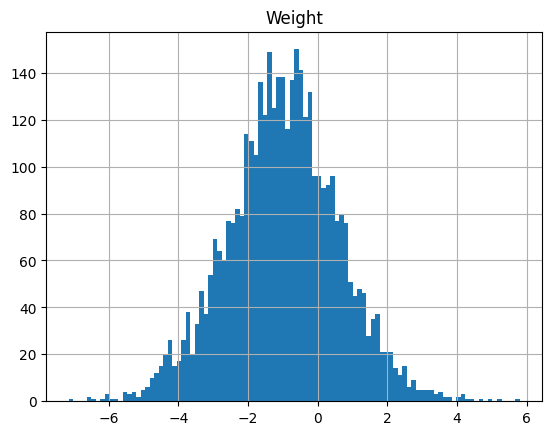

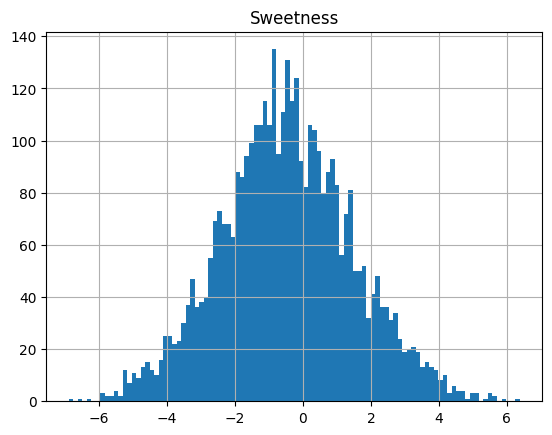

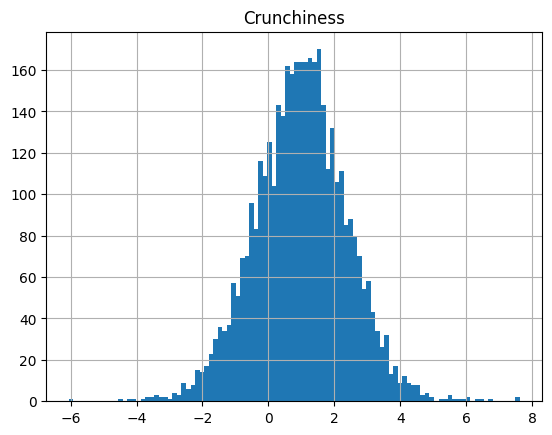

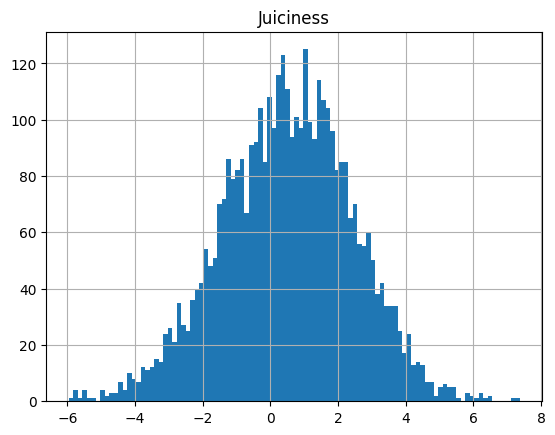

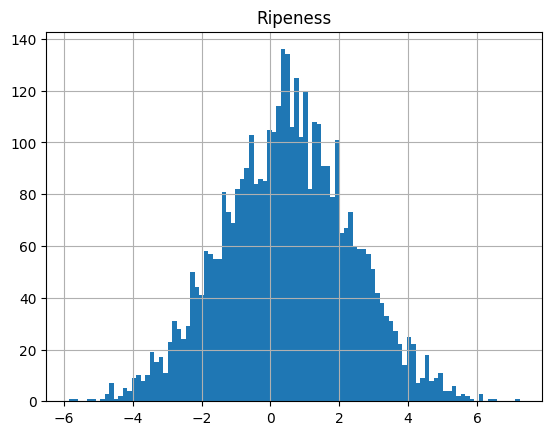

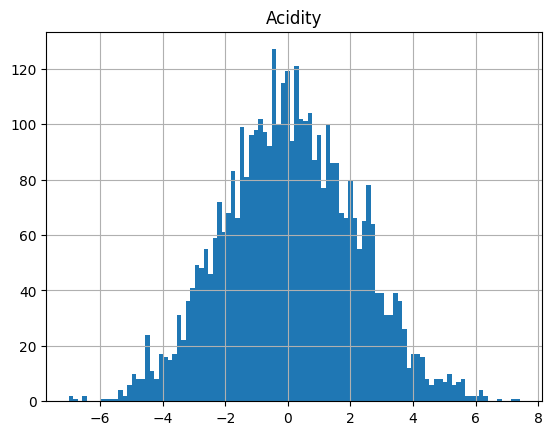

In [33]:
columns = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

for col in columns:
    df2.hist(col, bins=100)

In [34]:
outlier = df2[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR=Q3-Q1
df2_f = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

index_list = list(df2_f.index.values)
df2_f = df2[df2.index.isin(index_list)]

In [35]:
df2_f

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


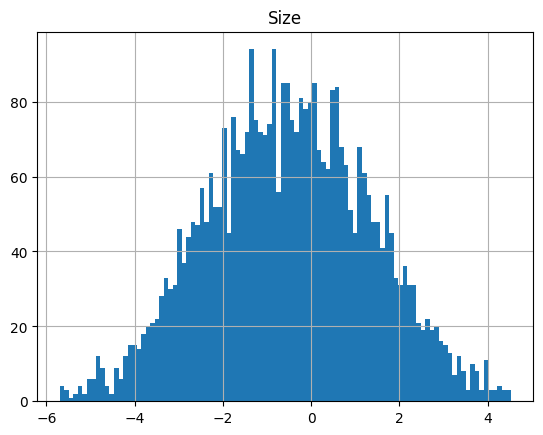

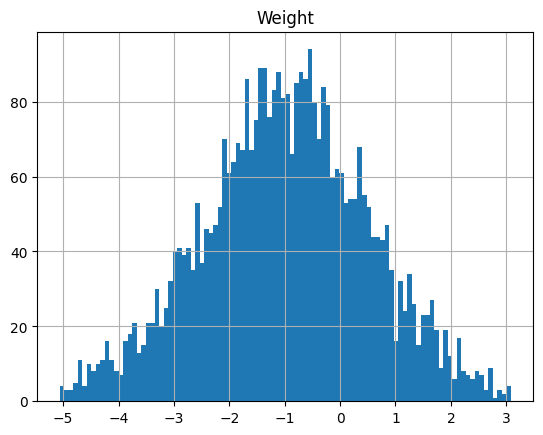

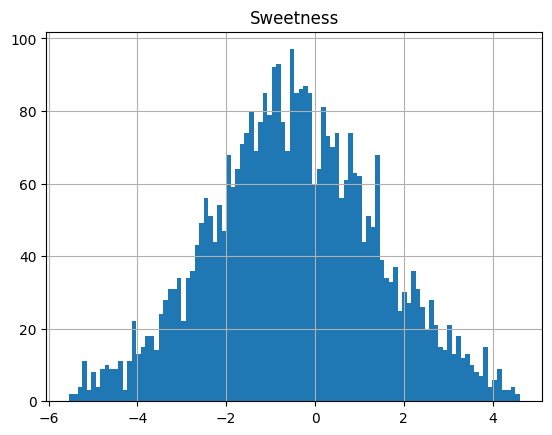

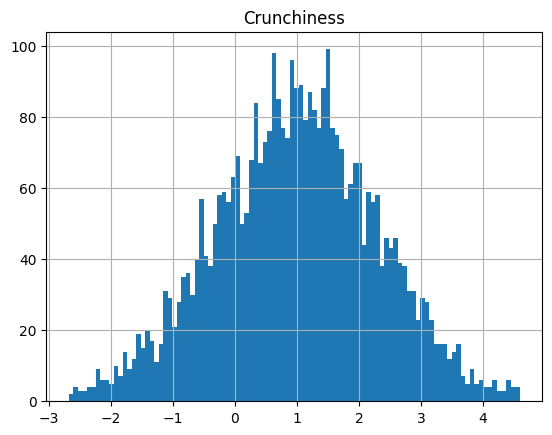

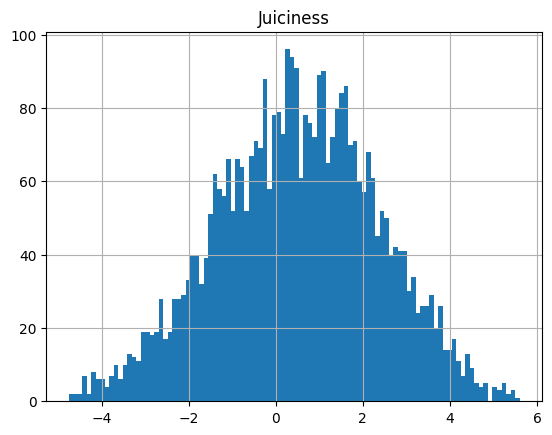

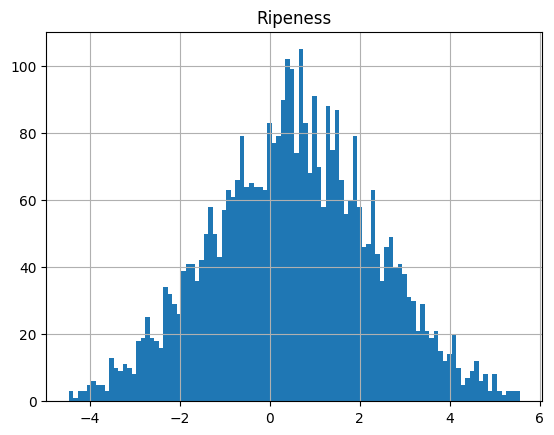

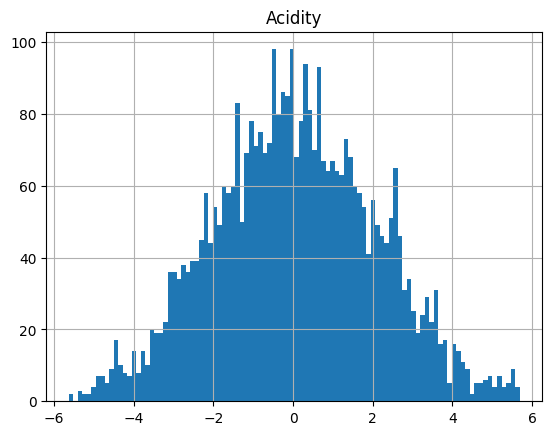

In [36]:
filtered_outlier = df2_f[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']]
for col in filtered_outlier:
    df2_f.hist(col, bins=100)

In [37]:
rand_state = 1000
y = df2_f['Quality']
X = df2_f.drop(["Quality"], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

## Модель

In [38]:
parameters = {'n_estimators': np.arange(1, 10, 1),
             "max_depth": np.arange(6, 13, 1),
             "min_samples_split": np.arange(2, 7, 1)}

#rf_cl_optimal = GridSearchCV(RandomForestClassifier(), parameters).fit(X_train, y_train)

#print(rf_cl_optimal.best_params_['n_estimators']) 9
#print(rf_cl_optimal.best_params_['max_depth']) 12
#print(rf_cl_optimal.best_params_['min_samples_split']) 4

In [39]:
rf_cl_optimal = RandomForestClassifier(n_estimators=9, max_depth=12, min_samples_split=4)
rf_cl_optimal.fit(X_train, y_train)
rf_cl_optimal_pred = rf_cl_optimal.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(y_test, rf_cl_optimal_pred)

array([[333,  48],
       [ 42, 335]], dtype=int64)

In [42]:
print(classification_report(y_test, rf_cl_optimal_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       381
           1       0.87      0.89      0.88       377

    accuracy                           0.88       758
   macro avg       0.88      0.88      0.88       758
weighted avg       0.88      0.88      0.88       758



## Базовая модель

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
cl = RandomForestClassifier(n_estimators=9,max_depth=12, min_samples_split=4)
cl.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=9)

In [45]:
cl_pred = cl.predict(X_test)

In [46]:
confusion_matrix(y_test, cl_pred)

array([[329,  52],
       [ 47, 330]], dtype=int64)

In [47]:
print(classification_report(y_test, cl_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       381
           1       0.86      0.88      0.87       377

    accuracy                           0.87       758
   macro avg       0.87      0.87      0.87       758
weighted avg       0.87      0.87      0.87       758

